<a href="https://colab.research.google.com/github/fofofizzz/AI-4032-course/blob/main/Hw1/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Q2-PART I

#part 1

خوانده میشود loadmat فرمت فایل دانلود شده به صورت متلب است که با دستور

In [1]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# نمایش فایل های موجود در پوشه مد نظر ما
data_path = '/content/drive/My Drive/data'
print(os.listdir(data_path))

['110.mat']


In [ ]:
#file path: (/content/drive/My Drive/data/110.mat)

#part 2

In [ ]:
import scipy.io
from scipy.io import loadmat

'''
scipyخب ما در این بخش از کد ابتدا کتاب خانه
را اضافه میکنیمloadmat و از آن
چون ما به دستور loadmat
را ایمپورت کردیمscipy احتیاج داریم از این رو
'''

data = loadmat('/content/drive/My Drive/data/110.mat')   # بارگذاری فایل مد نظر ما

print(data.keys())                                       # نمایش اطلاعات کلیدی
print("\nX110RPM =" ,data["X110RPM"])                    # نمایش اطلاعات مربوط به دور
print("\nX110_DE_time =\n" ,data["X110_DE_time"])        #DEنمایش اطلاعات مربوط به متغیر
print("\nX110_FE_time =\n" ,data["X110_FE_time"])        #FEنمایش اطلاعات مربوط به متغیر

dict_keys(['__header__', '__version__', '__globals__', 'X110_DE_time', 'X110_FE_time', 'X110RPM'])

X110RPM = [[1772]]

X110_DE_time =
 [[ 0.03212677]
 [ 0.07823077]
 [ 0.16146831]
 ...
 [-0.08845292]
 [-0.02899754]
 [ 0.00855323]]

X110_FE_time =
 [[0.08629091]
 [0.11053455]
 [0.11012364]
 ...
 [0.40145818]
 [0.46782   ]
 [0.52534727]]


در این فایل دو آرایه متشکل از تعداد زیادی فلوت موجود است که به نام های مشخص شده ذخیره شده اند و یک متغیر به نام دور بر دقیقه نیز موجود است که آرایه ای یک بعدی است

In [ ]:
signal = data[ 'X110_DE_time' ]

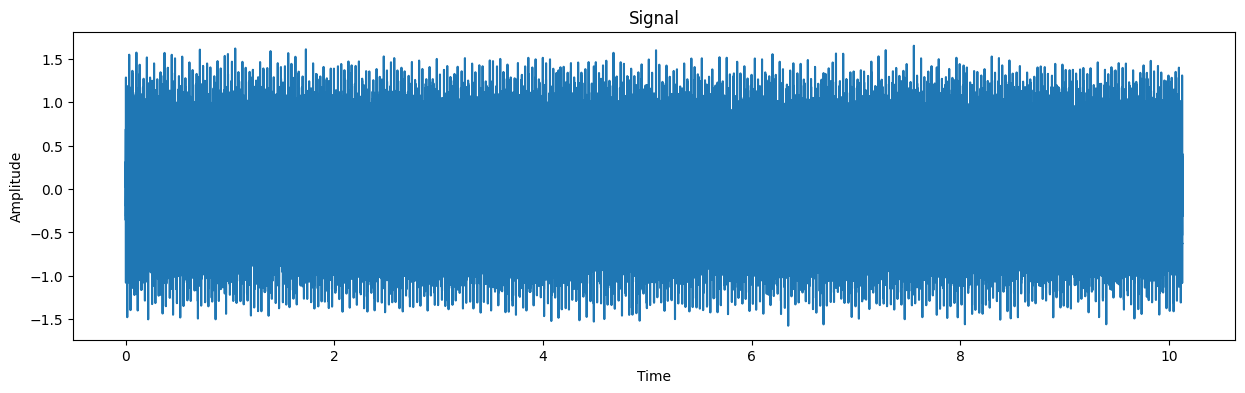

In [ ]:
import matplotlib.pyplot as plt         #we use matplotlib.pyplot
fs=48000                                #declaring the frequence
time = np.arange(len(signal)) / fs      #declaring the time that it continue
plt.figure(figsize=(15, 4))             # ایجاد یک شکل با عرض 15  و ارتفاع 4 برای نمایش بهتر
plt.plot(time,signal)                   #making a plot
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.show()

In [ ]:
#چون فرکانس را ۴۸ هزار در نظر گرفتیم و ما ۴۸ هزار نمونه داریم
#تمام این نمونه 10 ثانیه خواهد شد

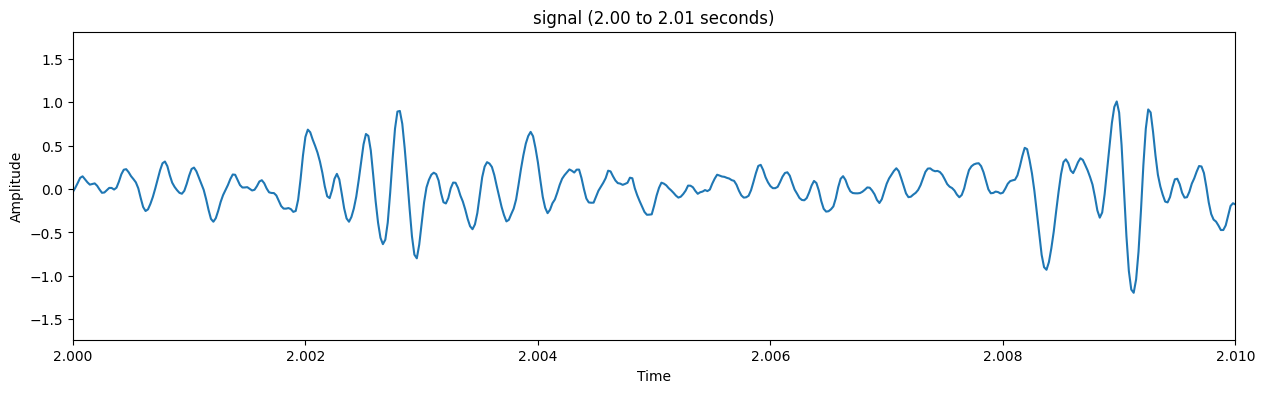

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('signal (2.00 to 2.01 seconds)')

plt.xlim(2.0, 2.01)

plt.show()

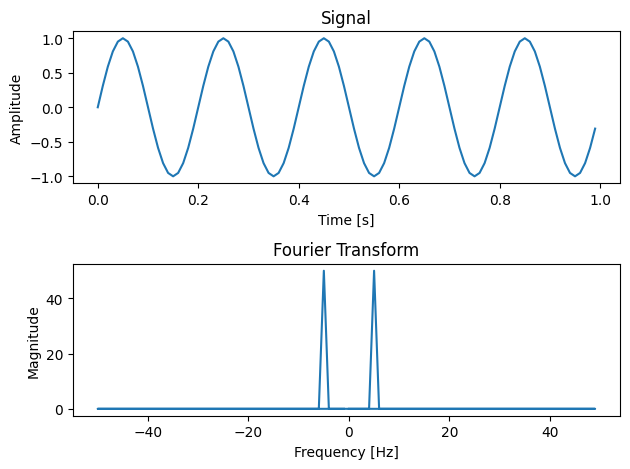

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = len(signal)  # Assuming 'your_signal' is your data array
# تابع برای ایجاد سیگنال
def create_signal(frequency, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

# تابع برای نمایش تبدیل فوریه
def fourier_transform(signal, sample_rate):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/sample_rate)
    spectrum = np.fft.fft(signal)

    return freq, np.abs(spectrum)

# پارامترهای سیگنال
frequency = 5  # فرکانس سیگنال
duration = 1  # مدت زمان سیگنال به ثانیه
sample_rate = 100  # نرخ نمونه‌برداری

# ایجاد سیگنال
t, signal = create_signal(frequency, duration, sample_rate)

# محاسبه تبدیل فوریه
freq, spectrum = fourier_transform(signal, sample_rate)

# نمایش سیگنال
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq[:n//2], spectrum[:n//2])
plt.title('Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()